#### Context: 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. 

#### Objective: 

The classification goal is to predict the likelihood of a liability customer buying personal loans. 

### 1. Read the column description, perform EDA

#### Dataset Attribute:

* Age                : Customer's age in completed years  
* Experience         : #years of professional experience    
* Income             : Annual income of the customer 
* ZIP Code           : Home Address ZIP code.  
* Family             : Family size of the customer   
* CCAvg              : Avg. spending on credit cards per month 
* Education          : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional   
* Mortgage           : Value of house mortgage if any. 
* Personal Loan      : Did this customer accept the personal loan offered in the last campaign?  
* Securities Account : Does the customer have a securities account with the bank?  
* CD Account         : Does the customer have a certificate of deposit (CD) account with the bank?   
* Online             : Does the customer use internet banking facilities?  
* Credit card        : Does the customer use a credit card issued by  UniversalBank?

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import statsmodels.api as sm
from sklearn import model_selection

#### Read the data

In [2]:
cust_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#### Exploratory Data Analysis

In [3]:
#cust_data = df.drop('ID', axis=1 ) # dropping this column as it will be 1-1 mapping anyways
cust_data.head() #Get the first five records from the dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
cust_data.info() #Get information on the attributes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
cust_data.isnull().count() #Check if there is any null in the data

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [6]:
cust_data.dtypes #datatypes of the attributes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
cust_data.shape #shape of the dataframe

(5000, 14)

**Observation:** From the above, we can see that there are 14 attributes and 5000 records in total and that there are no null values, missing values in the data. 

#### Data Type Analysis:

There are different variables - 

###### Quantitative Variables 
* Age
* Experience
* Income
* CCAvg
* Mortgage

###### Categorical Variables 
Ordinal:
* Family
* Education

Nominal:
* ID
* Zip Code
* Securities Account
* CD Account
* Online
* Credit Card

**Observation:** Quantitative variables should be declared as type float. Nominal variables ID, ZIP Code should be declared as str.

In [8]:
cust_data[["Age","Experience","Income","CCAvg","Mortgage"]] = cust_data[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)
cust_data[['ID','ZIP Code']] = cust_data[['ID','ZIP Code']].astype('str')

In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null object
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIP Code              5000 non-null object
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(5), int64(7), object(2)
memory usage: 547.0+ KB


In [10]:
cust_data.describe().transpose() #Distribution of various attribute

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**Observation:** From the above distribution, we could see that the Experience column has negative data. We would need to correct the negative data

#### Data Cleaning - Handling irregular value

In [11]:
# Get the count of negative values in Experience column
cust_data[cust_data['Experience'] < 0]['Experience'].count()

52

In [12]:
# Get the absolute values for the Experience column
cust_data["Experience"] = cust_data["Experience"].apply(abs)

In [13]:
# Get the count of negative values in Experience column
cust_data[cust_data['Experience'] < 0]['Experience'].count()

0

In [14]:
cust_data.describe().transpose() #Distribution of various attribute

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### 2. Data Distribution Analysis

###### Univariate Analysis

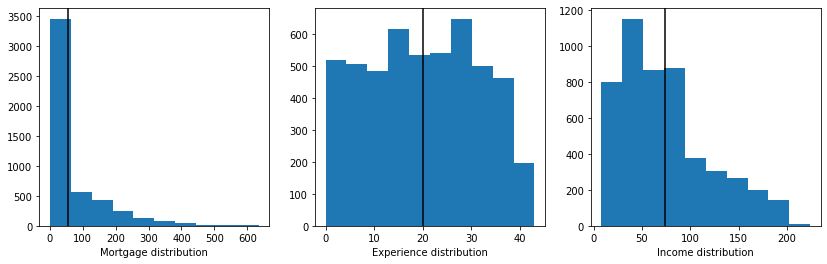

In [15]:
# Histogram Plot of Quantitative Data

fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(cust_data.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(cust_data.Mortgage.mean(), color = "black")

ax1.hist(cust_data.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(cust_data.Experience.mean(), color = "black");

ax2.hist(cust_data.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(cust_data.Income.mean(), color = "black");

**Observation:**
 * Mortgage and income are positively skewed
 * Experience is evenly distributed after fixing the negative values

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

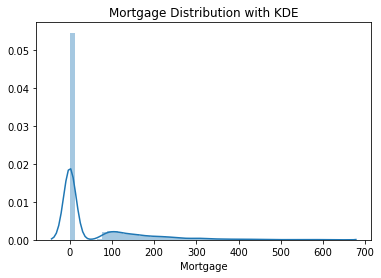

In [16]:
# KDE Plot of Mortgage

sns.distplot(cust_data["Mortgage"])
plt.title("Mortgage Distribution with KDE")

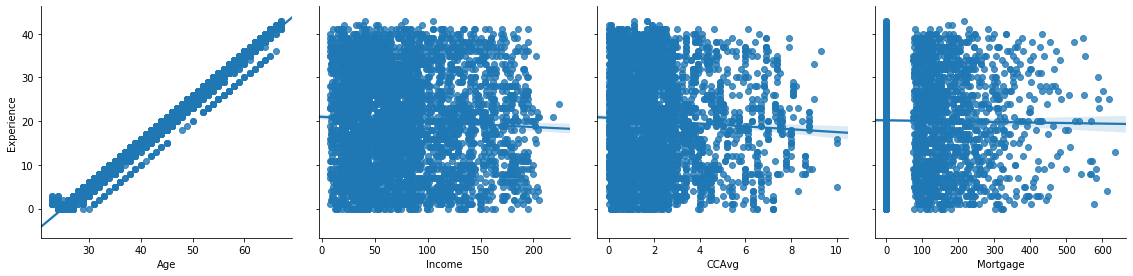

In [17]:
# Lets find the relationship between quantitative variables with Experience

ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(cust_data, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

**Observation:** It is seen that Age has a strong positive association with Experience. 

###### Multivariate Analysis

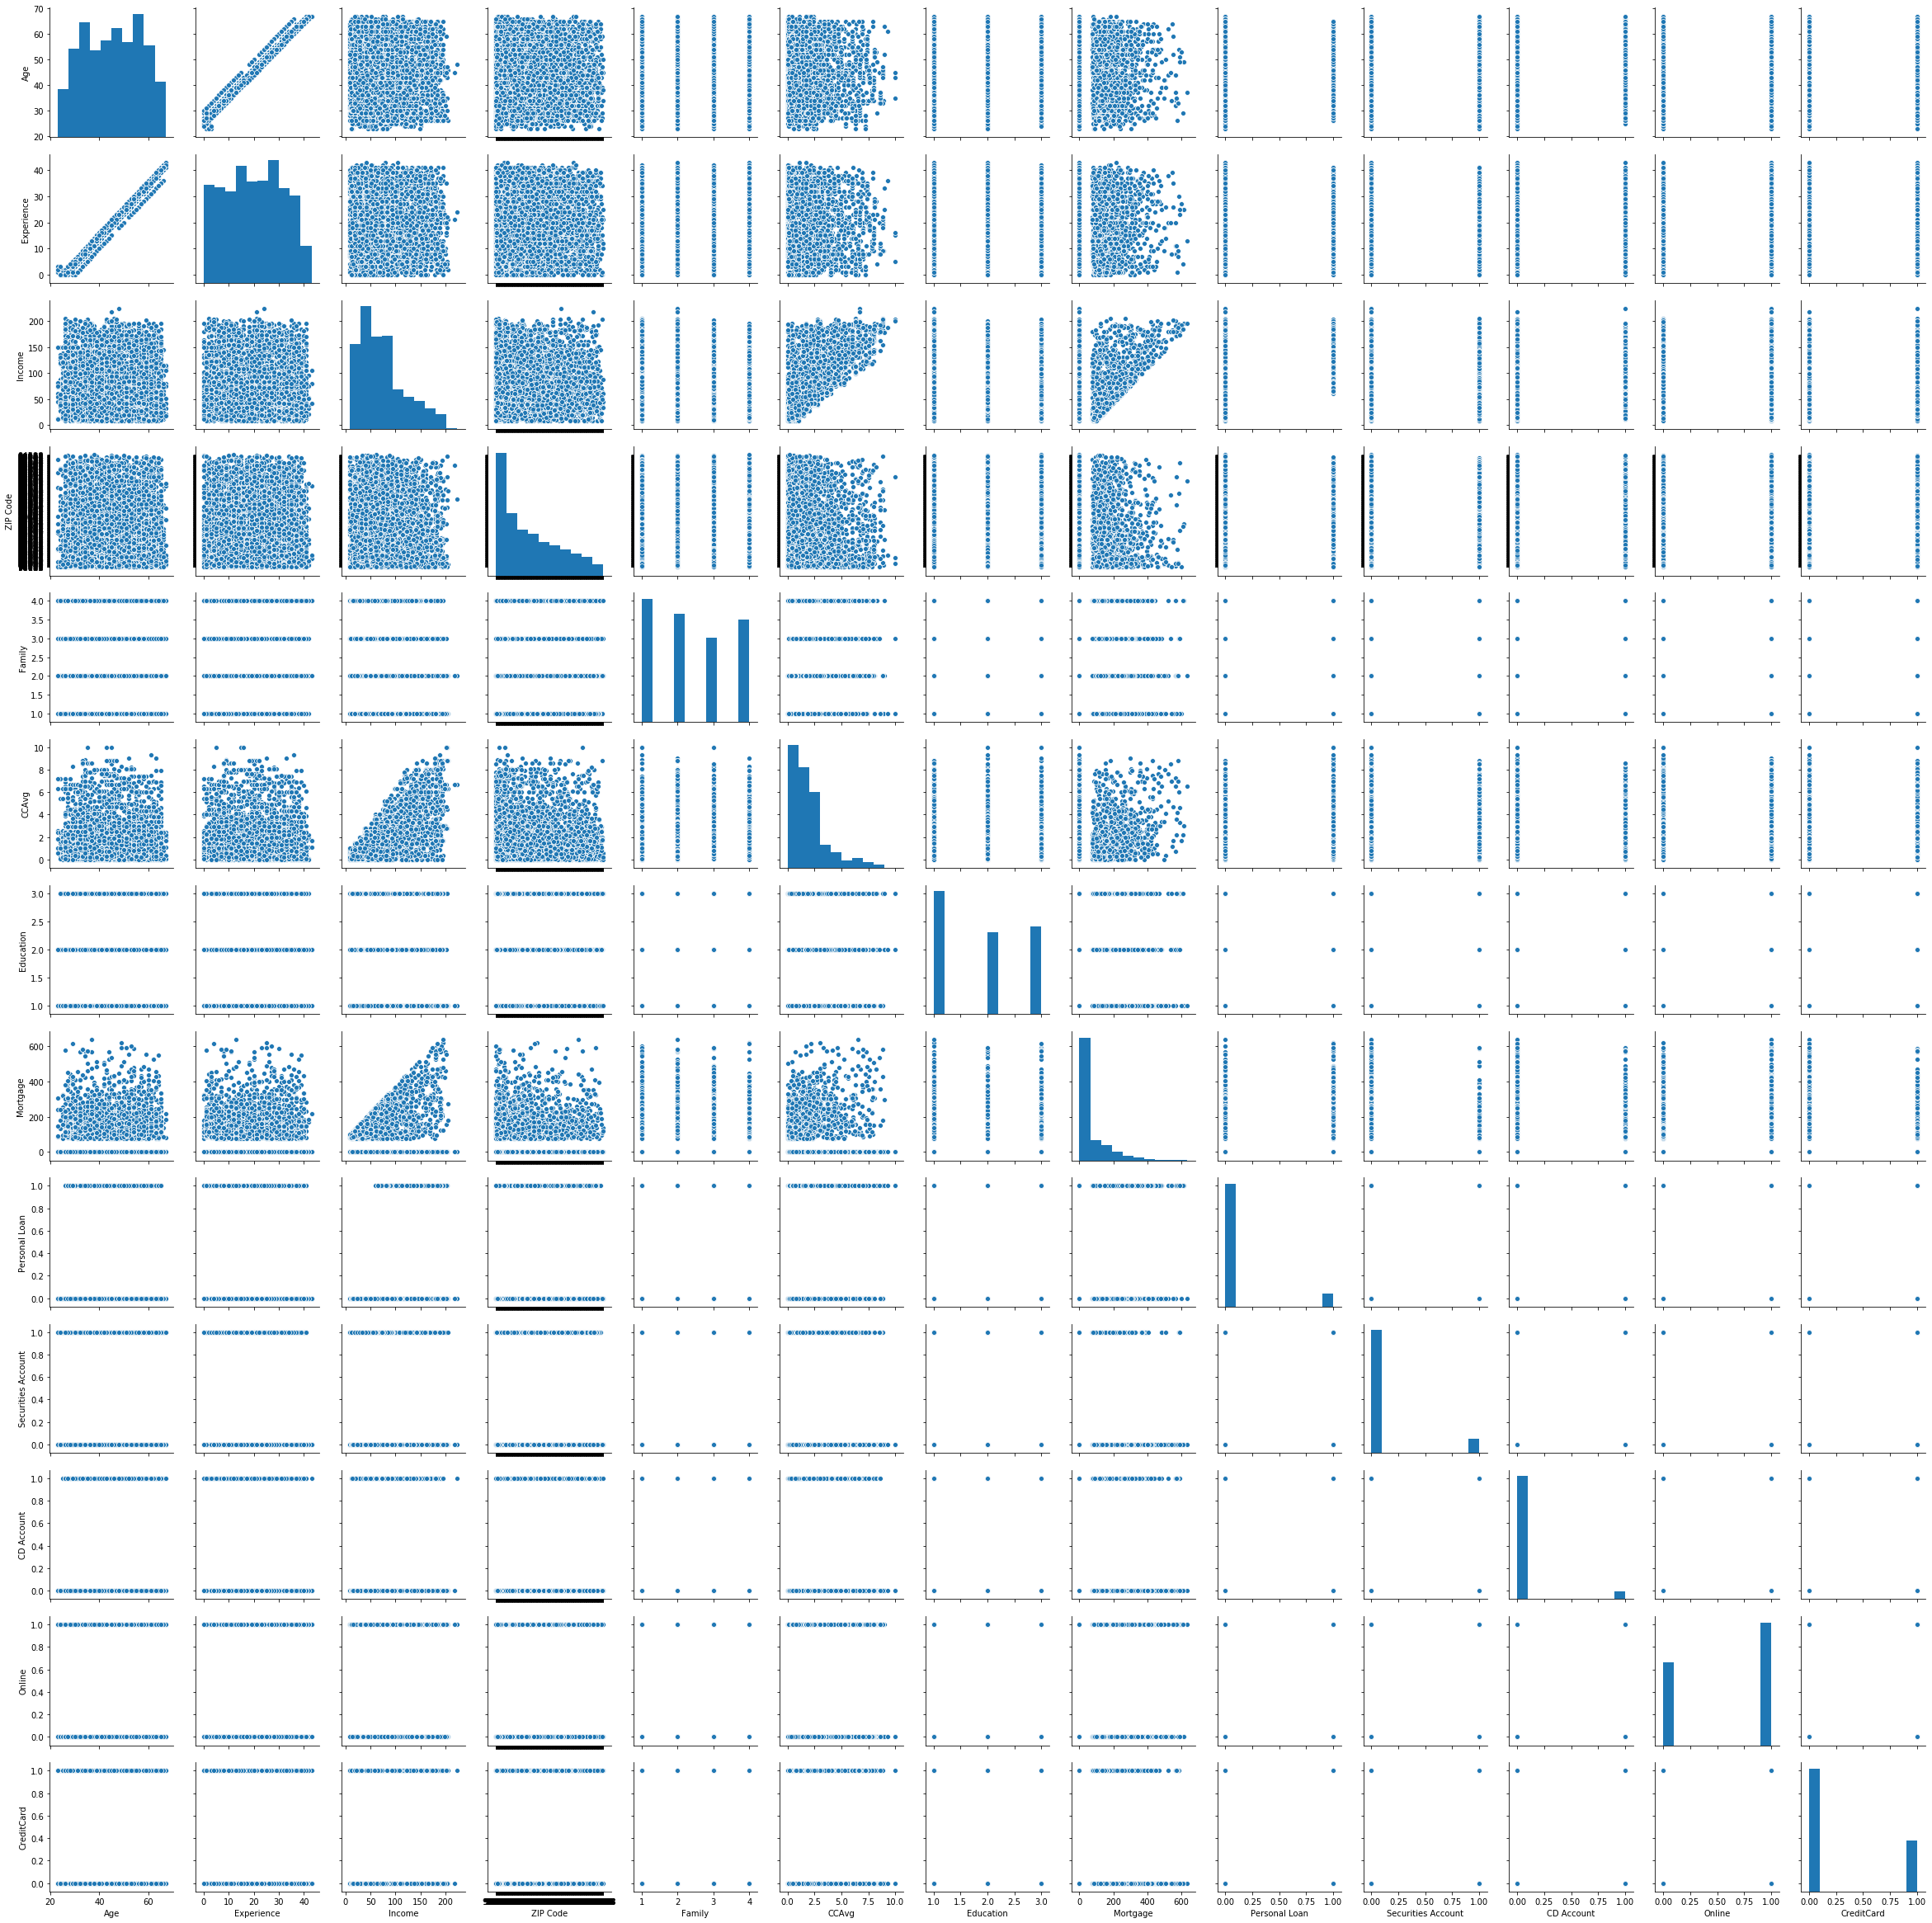

In [18]:
# Pairplot
sns.pairplot(cust_data.iloc[:,1:])

##### Observations from Distribution Analysis:

 * Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
 * Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median.
 * Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
 * CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
 * Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
 * The variables family and education are ordinal variables. The distribution of families is evenly distributed

### Feature correlation analysis

###### Heatmap correlation

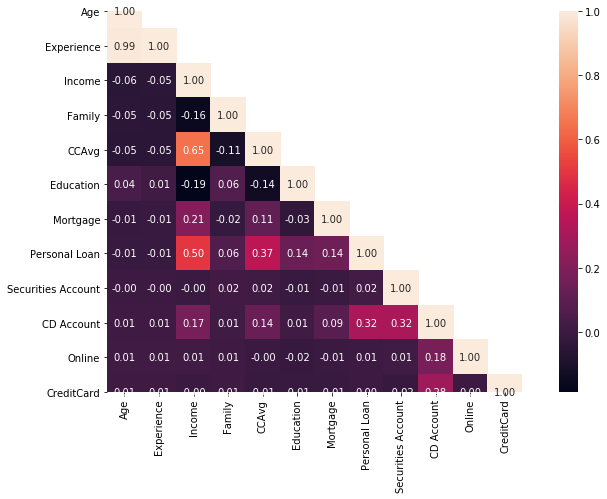

In [19]:
corr = cust_data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.figure(figsize=(13,7))
sns.heatmap(corr, mask=mask,annot=True,square=True,fmt='.2f')
#sns.heatmap(corr,annot=True,square=True

**Observation :**
 * Income and CCAvg is moderately correlated.
 * Age and Experience is highly correlated
 * Income, CCAvg have positive association with Personal Loan

### 3. Target Column Distribution

In [20]:
source_counts =pd.DataFrame(cust_data["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

,Labels,Personal Loan
0,0,4520
1,1,480


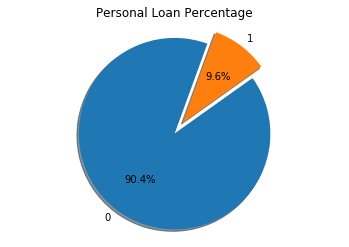

In [21]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

###### Bivariate Analysis

Text(0.5, 1.0, 'Mortgage Distribution')

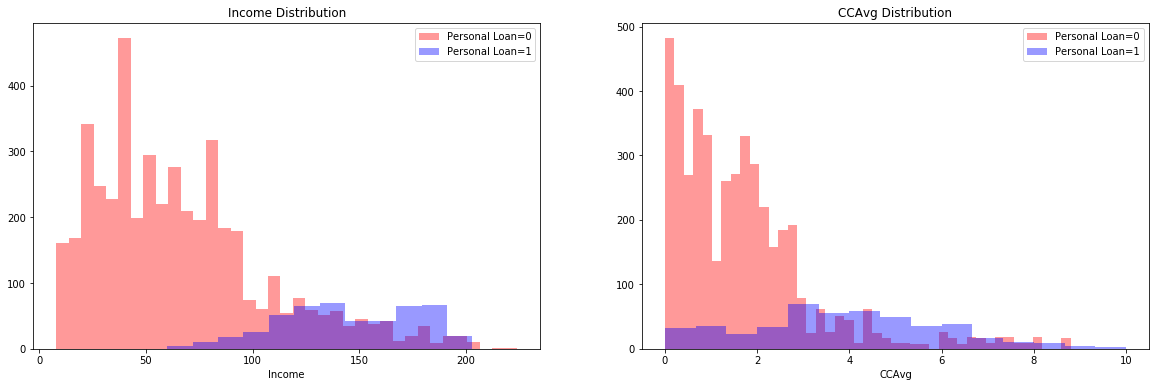

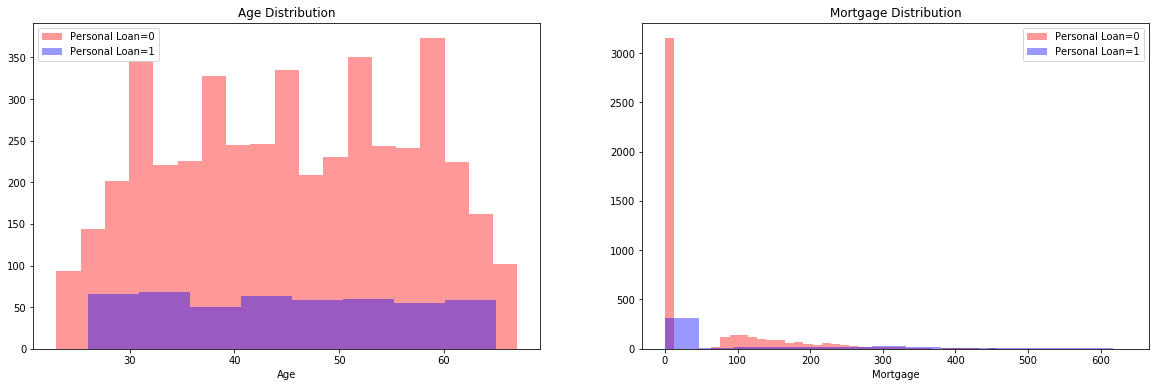

In [22]:
# Distribution of Quantitative variables against Personal Loan

# Income Distribution Against Personal Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(cust_data[cust_data["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(cust_data[cust_data["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

## CCAvg Distribution against Personal Loan
plt.subplot(1, 2, 2)
sns.distplot(cust_data[cust_data["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(cust_data[cust_data["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

# Age Distribution against Personal Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(cust_data[cust_data["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(cust_data[cust_data["Personal Loan"] == 1]['Age'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Age Distribution")

# Mortgage Distribution against Personal Loan
plt.subplot(1, 2, 2)
sns.distplot(cust_data[cust_data["Personal Loan"] == 0]['Mortgage'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(cust_data[cust_data["Personal Loan"] == 1]['Mortgage'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Mortgage Distribution")

In [23]:
print('Income of Non-Loan customers: ',
      cust_data[cust_data["Personal Loan"] == 0]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('Income of Loan customers    : ', 
      cust_data[cust_data["Personal Loan"] == 1]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('\n')
print('Credit card spending of Non-Loan customers: ',
      cust_data[cust_data["Personal Loan"] == 0]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('Credit card spending of Loan customers    : ', 
      cust_data[cust_data["Personal Loan"] == 1]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('\n')
print('Age of Non-Loan customers: ',
      cust_data[cust_data["Personal Loan"] == 0]['Age'].median())
print('Age of Loan customers    : ', 
      cust_data[cust_data["Personal Loan"] == 1]['Age'].median())
print('\n')
print('Mortgage of Non-Loan customers: ',
      cust_data[cust_data["Personal Loan"] == 0]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)
print('Mortgage of Loan customers    : ', 
      cust_data[cust_data["Personal Loan"] == 1]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)

Income of Non-Loan customers:  59000.0
Income of Loan customers    :  142500.0


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Age of Non-Loan customers:  45.0
Age of Loan customers    :  45.0


Mortgage of Non-Loan customers:  51789.38053097345
Mortgage of Loan customers    :  100845.83333333333


**Observation :**
 * The graph shows the income of people with personal loan is higher.
 * The graph show persons who have personal loan have a higher credit card average. 
 * The graph shows the age has no influence on personal loan.
 * The graph shows the mortgage of people with personal loan is higher.

Text(0.5, 1.0, 'CD Account Countplot')

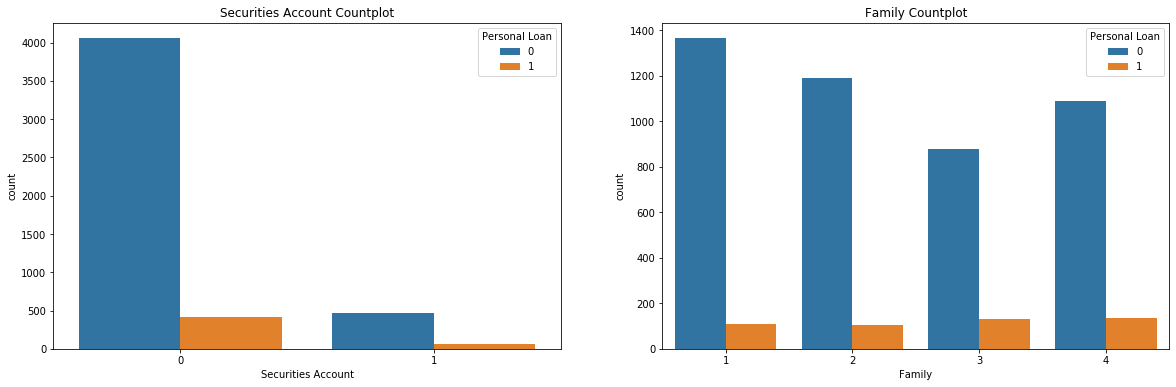

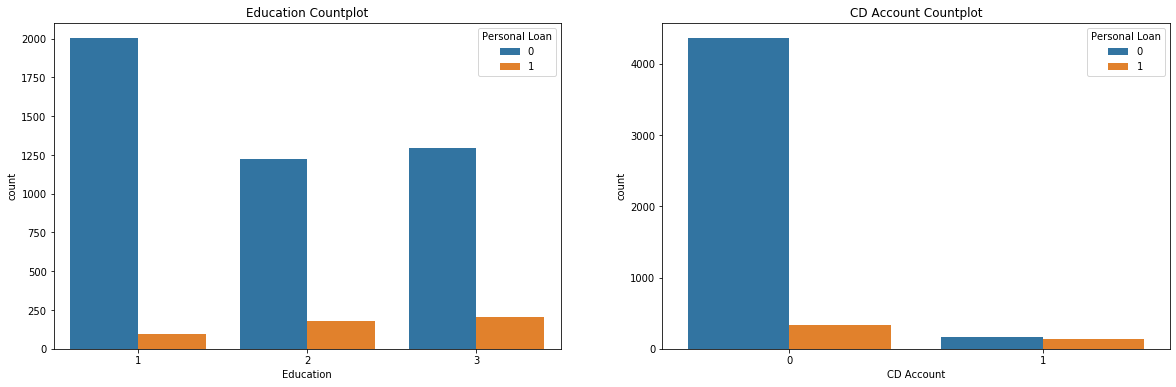

In [24]:
# Distribution of Categorical variables against Personal Loan

#Securities Account
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Securities Account',data=cust_data,hue='Personal Loan')
plt.title("Securities Account Countplot")

#Family Size
plt.subplot(1, 2, 2)
sns.countplot(x='Family',data=cust_data,hue='Personal Loan')
plt.title("Family Countplot")

#Education
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Education',data=cust_data,hue='Personal Loan')
plt.title("Education Countplot")

#CD Account
plt.subplot(1, 2, 2)
sns.countplot(x='CD Account',data=cust_data,hue='Personal Loan')
plt.title("CD Account Countplot")

**Observation :** 
 * Majority of customers who does not have loan have securities account
 * Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.
 * Education does not have any impact in personal loan. It looks like advanced professionals go for more loans compared to under grads, post grads. 
 * Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

**Influence of income and education on personal loan**

Text(0.5, 1.0, 'Income and Education Boxplot')

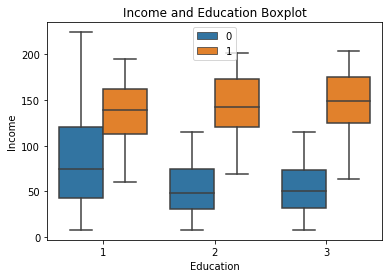

In [25]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=cust_data)
plt.legend(loc='upper center')
plt.title("Income and Education Boxplot")

**Observation :** It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

**Influence of mortgage and education on personal loan**

Text(0.5, 1.0, 'Mortgage and Education Boxplot')

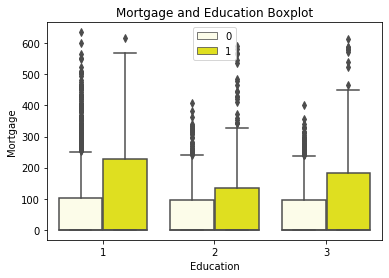

In [26]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=cust_data,color='yellow')
plt.legend(loc='upper center')
plt.title("Mortgage and Education Boxplot")

**Observation :** From the above chart it seems that the value of house mortagage for the non-applicants is much lower than that of applicants. This could be a possible reason for them not applying for a loan or not finding a policy based on there need.

**Influence of income and family on personal loan**

Text(0.5, 1.0, 'Family and Income Boxplot')

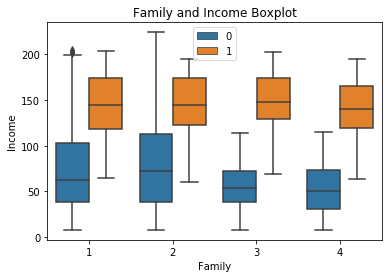

In [27]:
sns.boxplot(x="Family", y="Income", hue="Personal Loan", data=cust_data)
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

**Observation :** Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income.

### 4. Split Train and Test Data

We will use 70% of data for training and 30% for testing.

In [28]:
X = cust_data.drop(["ID","Personal Loan"],axis=1)
Y = cust_data["Personal Loan"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,41.0,17.0,34.0,91361,1,0.7,1,143.0,0,0,0,0
4086,50.0,26.0,11.0,93106,4,0.2,1,0.0,1,0,0,0
2881,49.0,25.0,55.0,92103,4,0.1,3,0.0,0,0,1,0
1237,38.0,13.0,169.0,92093,1,6.8,3,0.0,0,1,1,1
1429,31.0,5.0,35.0,95064,1,0.6,3,171.0,0,0,0,0


Lets check split of data

In [30]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cust_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(cust_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [31]:
y_train.value_counts()

0    3178
1     322
Name: Personal Loan, dtype: int64

**Scale the data**

In [32]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(x_test)

### 5. Predictions through various Classification Models

**5a. Logistic Regression**

In [33]:
#Build the logistic regression model
logisticRegr = LogisticRegression()

In [34]:
logisticRegr.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Use score method to get accuracy of train model
logreg_train_score = logisticRegr.score(x_train, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score),4))

# Use score method to get accuracy of test model
logreg_test_score = logisticRegr.score(x_test, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score),4))

Train Accuracy Score: 0.912
Test Accuracy Score: 0.8993


**Predict for Test Data**

In [36]:
#Predict for train set
pred_train = logisticRegr.predict(x_train)

#Confusion Matrix
logreg_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train.index.name = "Predicted"
logreg_cm_train.columns.name = "True"
logreg_cm_train

True,No,Yes
Predicted,,
No,3097,227
Yes,81,95


In [37]:
#Predict for test set
pred_test = logisticRegr.predict(x_test)

#Confusion Matrix
logreg_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test.index.name = "Predicted"
logreg_cm_test.columns.name = "True"
logreg_cm_test

True,No,Yes
Predicted,,
No,1308,117
Yes,34,41


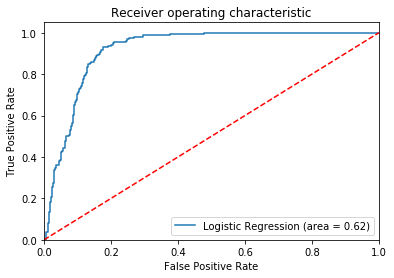

In [38]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:
#Calculate auc score
auc_score = metrics.roc_auc_score(y_test, logisticRegr.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.92

In [40]:
# summarize the fit of the model
logreg_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
print( 'Total Accuracy : ', logreg_accuracy)
print('\n')
print('Metrics Classification Report \n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.8993


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.55      0.26      0.35       158

    accuracy                           0.90      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.88      0.90      0.88      1500



In [41]:
### Fit Scaled Data
logisticRegr.fit(X_train_scaled, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Use score method to get accuracy of train model
logreg_train_score_scaled = logisticRegr.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score_scaled),4))

# Use score method to get accuracy of test model
logreg_test_score_scaled = logisticRegr.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score_scaled),4))

Train Accuracy Score: 0.9557
Test Accuracy Score: 0.9453


In [43]:
#Predict for train set
pred_train_scaled = logisticRegr.predict(X_train_scaled)

#Confusion Matrix
logreg_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train_scaled.index.name = "Predicted"
logreg_cm_train_scaled.columns.name = "True"
logreg_cm_train_scaled

True,No,Yes
Predicted,,
No,3136,113
Yes,42,209


In [44]:
#make predictions
pred_test_scaled = logisticRegr.predict(X_test_scaled)

In [45]:
#Confusion Matrix
logreg_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test_scaled.index.name = "Predicted"
logreg_cm_test_scaled.columns.name = "True"
logreg_cm_test_scaled

True,No,Yes
Predicted,,
No,1330,70
Yes,12,88


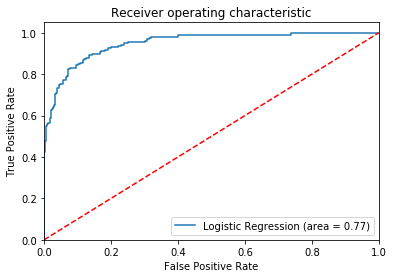

In [46]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_scaled = roc_auc_score(y_test, logisticRegr.predict(X_test_scaled))
fpr_s, tpr_s, thresholds_s = roc_curve(y_test, logisticRegr.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr_s, tpr_s, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_scaled)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_scaled')
plt.show()

In [47]:
#Calculate auc score
auc_score_scaled = metrics.roc_auc_score(y_test, logisticRegr.predict_proba(X_test_scaled)[:,1])
round( float( auc_score_scaled ), 2 )

0.95

In [48]:
# summarize the fit of the model for scaled data
logreg_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_scaled ), 4 )
print( 'Total Accuracy : ', logreg_accuracy_scaled)
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_scaled))

Total Accuracy :  0.9453


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.88      0.56      0.68       158

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.94      0.95      0.94      1500



**5b. Gaussian Naive Bayes Model**

In [49]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

# Use score method to get accuracy of train model
NB_train_score = model.score(x_train, y_train)
print('Train Accuracy Score:', np.round((NB_train_score),4))

# Use score method to get accuracy of test model
NB_test_score = model.score(x_test, y_test)
print('Test Accuracy Score:', np.round((NB_test_score),4))

Train Accuracy Score: 0.8874
Test Accuracy Score: 0.8873


In [50]:
#Predict for train set
pred_train_NB = model.predict(x_train)

#Confusion Matrix
NB_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train.index.name = "Predicted"
NB_cm_train.columns.name = "True"
NB_cm_train

True,No,Yes
Predicted,,
No,2923,139
Yes,255,183


In [51]:
# make predictions
expected = y_test
pred_test_NB = model.predict(x_test)

In [52]:
#Confusion Matrix
NB_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test.index.name = "Predicted"
NB_cm_test.columns.name = "True"
NB_cm_test

True,No,Yes
Predicted,,
No,1235,62
Yes,107,96


In [53]:
#Calculate auc score
NB_auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( NB_auc_score ), 2 )

0.93

In [54]:
# summarize the fit of the model
NB_accuracy = np.round( metrics.accuracy_score( expected, pred_test_NB ), 4 )
print( 'Total Accuracy : ', NB_accuracy)
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(expected, pred_test_NB))

Total Accuracy :  0.8873


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



In [55]:
### Fit Scaled Data
model.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# Use score method to get accuracy of train model
NB_train_score_scaled = model.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((NB_train_score_scaled),4))

# Use score method to get accuracy of test model
NB_test_score_scaled = model.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((NB_test_score_scaled),4))

Train Accuracy Score: 0.884
Test Accuracy Score: 0.888


In [57]:
#Predict for train set
pred_train_NB_scaled = model.predict(X_train_scaled)

#Confusion Matrix
NB_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_NB_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train_scaled.index.name = "Predicted"
NB_cm_train_scaled.columns.name = "True"
NB_cm_train_scaled

True,No,Yes
Predicted,,
No,2912,140
Yes,266,182


In [58]:
#make predictions
pred_test_NB_scaled = model.predict(X_test_scaled)

In [59]:
#Confusion Matrix
NB_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_NB_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test_scaled.index.name = "Predicted"
NB_cm_test_scaled.columns.name = "True"
NB_cm_test_scaled

True,No,Yes
Predicted,,
No,1238,64
Yes,104,94


In [60]:
#Calculate auc score
NB_auc_score_scaled = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
round( float( NB_auc_score_scaled ), 2 )

0.93

In [61]:
# summarize the fit of the model for scaled data
NB_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_NB_scaled ), 4 )
print( 'Total Accuracy : ', NB_accuracy_scaled)
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_NB_scaled))

Total Accuracy :  0.888


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.59      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



**5c. K-Nearest Neighbours Classification**

**Find the optimal value of k**

In [62]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [63]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


In [64]:
# Invoking the KNN function to create the model
# fitting the model in the training data set

NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance')
NNH.fit(x_train, y_train)

# Use score method to get accuracy of train model
KNN_train_score = NNH.score(x_train, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score),4))

# Use score method to get accuracy of test model
KNN_test_score = NNH.score(x_test, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score),4))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.8933


In [65]:
#Predict for train set
pred_train_KNN = NNH.predict(x_train)

#Confusion Matrix
KNN_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train.index.name = "Predicted"
KNN_cm_train.columns.name = "True"
KNN_cm_train

True,No,Yes
Predicted,,
No,3178,0
Yes,0,322


In [66]:
#make predictions for test set
pred_test_KNN = NNH.predict(x_test)

In [67]:
#Confusion Matrix
KNN_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test.index.name = "Predicted"
KNN_cm_test.columns.name = "True"
KNN_cm_test

True,No,Yes
Predicted,,
No,1303,121
Yes,39,37


In [68]:
#Calculate auc score
KNN_auc_score = metrics.roc_auc_score(y_test, NNH.predict_proba(x_test)[:,1])
round( float( KNN_auc_score ), 2 )

0.83

In [69]:
# summarize the fit of the model

KNN_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_KNN ), 4 )
print( 'Total Accuracy : ', KNN_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_KNN))

Total Accuracy :  0.8933


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1342
           1       0.49      0.23      0.32       158

    accuracy                           0.89      1500
   macro avg       0.70      0.60      0.63      1500
weighted avg       0.87      0.89      0.88      1500



In [70]:
### Fit scaled data
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [71]:
# Use score method to get accuracy of train model
KNN_train_score_scaled = NNH.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score_scaled),4))

# Use score method to get accuracy of test model
KNN_test_score_scaled = NNH.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score_scaled),4))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.9493


In [72]:
#Predict for train set
pred_train_KNN_scaled = model.predict(X_train_scaled)

#Confusion Matrix
KNN_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train_scaled.index.name = "Predicted"
KNN_cm_train_scaled.columns.name = "True"
KNN_cm_train_scaled

True,No,Yes
Predicted,,
No,2912,140
Yes,266,182


In [73]:
#make predictions
pred_test_KNN_scaled = NNH.predict(X_test_scaled)

In [74]:
#Confusion Matrix
KNN_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test_scaled.index.name = "Predicted"
KNN_cm_test_scaled.columns.name = "True"
KNN_cm_test_scaled

True,No,Yes
Predicted,,
No,1338,72
Yes,4,86


In [75]:
#Calculate auc score
KNN_auc_score_scaled = metrics.roc_auc_score(y_test, NNH.predict_proba(X_test_scaled)[:,1])
round( float( KNN_auc_score_scaled ), 2 )

0.93

In [76]:
# summarize the fit of the model
KNN_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_KNN_scaled ), 4 )
print( 'Total Accuracy : ', KNN_accuracy_scaled)
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_KNN_scaled))

Total Accuracy :  0.9493


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1342
           1       0.96      0.54      0.69       158

    accuracy                           0.95      1500
   macro avg       0.95      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



**6. Confusion Matrix for all the Models**


**6a. Confusion Matrix for Logistic Regression**


True         No  Yes
Predicted           
No         1308  117
Yes          34   41


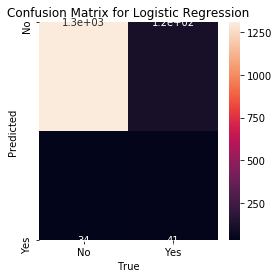

In [77]:
print(logreg_cm_test)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(logreg_cm_test, annot=True)

True         No  Yes
Predicted           
No         1330   70
Yes          12   88


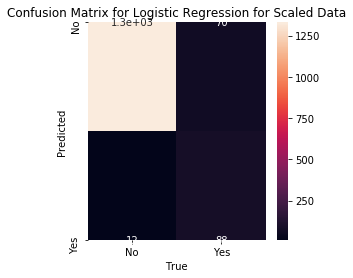

In [78]:
print(logreg_cm_test_scaled)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Logistic Regression for Scaled Data")
sns.heatmap(logreg_cm_test_scaled, annot=True)

**6b. Confusion Matrix for Naive Bayes**


True         No  Yes
Predicted           
No         1235   62
Yes         107   96


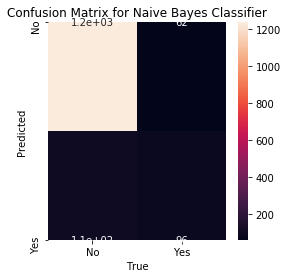

In [79]:
print(NB_cm_test)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Naive Bayes Classifier")
sns.heatmap(NB_cm_test, annot=True)

True         No  Yes
Predicted           
No         1238   64
Yes         104   94


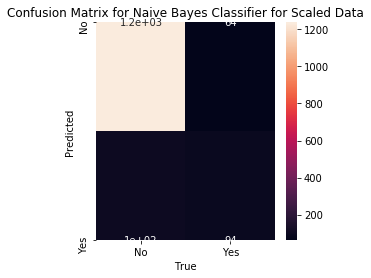

In [80]:
print(NB_cm_test_scaled)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Naive Bayes Classifier for Scaled Data")
sns.heatmap(NB_cm_test_scaled, annot=True)

**6c. Confusion Matrix for KNN**


True         No  Yes
Predicted           
No         1303  121
Yes          39   37


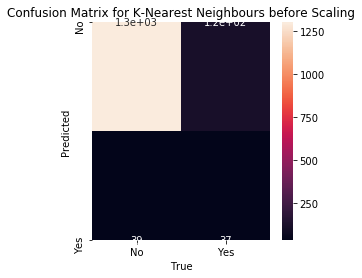

In [81]:
print(KNN_cm_test)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for K-Nearest Neighbours before Scaling")
sns.heatmap(KNN_cm_test, annot=True)

True         No  Yes
Predicted           
No         1338   72
Yes           4   86


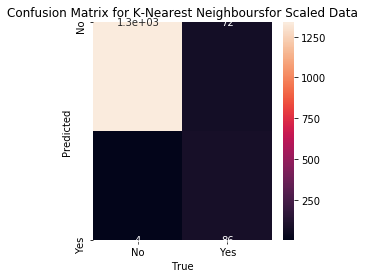

In [82]:
print(KNN_cm_test_scaled)

plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for K-Nearest Neighboursfor Scaled Data")
sns.heatmap(KNN_cm_test_scaled, annot=True)

### 7. Model Comparison

        Model  Training Set Accuracy  Testing Set Accuracy  Model Accuracy
0          LR               0.912000              0.899333          0.8993
1          NB               0.887429              0.887333          0.8873
2         KNN               1.000000              0.893333          0.8933
3   LR Scaled               0.955714              0.945333          0.9453
4   NB Scaled               0.884000              0.888000          0.8880
5  KNN Scaled               1.000000              0.949333          0.9493


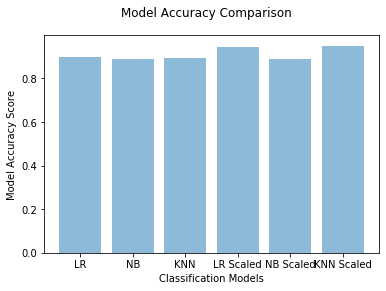

In [83]:
#Compare the Train, Test Set and Model accuracy of all the models
acc_dict = {'Model':['LR','NB','KNN','LR Scaled', 'NB Scaled', 'KNN Scaled'], 
            'Training Set Accuracy': [logreg_train_score, NB_train_score, KNN_train_score, 
                         logreg_train_score_scaled, NB_train_score_scaled, KNN_train_score_scaled],
            'Testing Set Accuracy': [logreg_test_score, NB_test_score, KNN_test_score, 
                         logreg_test_score_scaled, NB_test_score_scaled, KNN_test_score_scaled],
            'Model Accuracy': [logreg_accuracy, NB_accuracy, KNN_accuracy, 
                         logreg_accuracy_scaled, NB_accuracy_scaled, KNN_accuracy_scaled]
           }
acc = pd.DataFrame(acc_dict)
print(acc)

# Accuracy comparison
lbl = ('LR', 'NB', 'KNN', 'LR Scaled', 'NB Scaled', 'KNN Scaled')
y_pos = np.arange(len(lbl))

fig = plt.figure()
fig.suptitle('Model Accuracy Comparison')
plt.bar(y_pos, acc['Model Accuracy'], align='center', alpha=0.5)
plt.xticks(y_pos, lbl)
plt.xlabel("Classification Models")
plt.ylabel("Model Accuracy Score")
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.907600 (0.007579)
NB: 0.886000 (0.010469)
KNN: 0.899200 (0.009086)


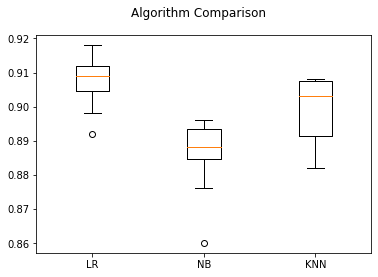

In [84]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation:** From the train, test set accuracy score, we could see that the models are just fitted as expected, they are not either over fitted or under fitted. The effect of data scaling is more pronounced in Logistic Regression and KNN while Naive Bayes is unaffected by scaliing.

Based on the accuracy score and model selection, we could see that **logistic regression model (89.93%)** predicts the possibility of a customer buying a personal loan better than Naive Bayes and KNN. However, from the accuracy score, the winner would **scaled KNN with an accuracy of 94.93%**.